# Базовая модель

## Описание модели

В модели присутствуют два вида агентов – **n** продавцов и **m** покупателей. В модели рассматривается только один вид товара, все продавцы хотят его продать, все покупатели его купить. 

## Продавцы

У каждого продавца **s** определено минимальное значение цены **s.min_price**, за которую он готов продать товар. Ниже этой цены продавцу невыгодно продавать товар. У разных продавцов значение **s.min_price** может быть разным. У каждого продавца значение **s.min_price** определяется в начале процесса моделирование как случайное число, равномерно распределенное на отрезке **[saller_min, saller_max]**. Величины **saller_min** и **saller_max** одинаковы для всех продавцов и являются параметрами модели.

Также у каждого продавца **s** есть значение ожидаемой цены продажи **s.expect_price**, которая всегда больше или равна, чем **s.min_price**. Изначально **s.expect_price** равно **saller_max**, но в дальнейшем может уменьшаться или увеличиваться на величину **saller_delta**, одинаковую для всех продавцов и являющейся параметром модели. Изменение **s.expect_price** происходит после взаимодействия данного продавца **s** с покупателем. Правила данного изменения будут описаны ниже. 


## Покупатели

У каждого покупателя **с** определено максимальное значение цены **c.max_price**, за которую он готов купить товар. Выше этой цены покупателю невыгодно покупать товар. У разных покупателей значение **c.max_price** может быть разным. У каждого покупателя значение **c.min_price** определяется в начале процесса моделирования как случайное число, равномерно распределенное на отрезке **[consumer_min ,consumer_max]**. Величины **consumer_min** и **consumer_max** одинаковы для всех продавцов и являются параметрами модели.
Также у каждого покупателя есть значение ожидаемой цены продажи **c.expect_price**, которая всегда меньше или равна, чем **c.max_price**. Изначально **c.expect_price** равно **0**, но в дальнейшем может уменьшаться или увеличиваться на величину **consumer_delta**, одинаковую для всех покупателей и являющейся параметром модели. Изменение **c.expect_price** происходит после взаимодействия данного покупателя c продавцом. Правила данного изменения будут описаны ниже. 


## Взаимодействие

На каждом шаге моделирования случайным равновероятным образом выбирается один продавец **s** и один покупатель **c**. Между ними происходит попытка заключения сделки. 

Если **s.expect_price** меньше или равно **c.expect_price** покупателя, то: 
1. сделка происходит,
2. **s.expect_price** увеличивается на **s.delta**,
3. **c.expect_price** уменьшается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки удовлетворяют ожиданиям как продавца, так и покупателя. Реальная стоимость купли-продажи может быть определена как **(s.expect_price + c.expect_price) / 2**, однако в данной модели эта величина никак не учитывается. 

При этом продавец считает, что если он сейчас продал товар за стоимость как минимум **s.expect_price**, то в дальнейшем он может его продать немного дороже и **s.expect_price** можно немного увеличить.

А покупатель считает, что он купил сейчас товар за стоимость не более **c.expect_price**, то в дальнейшем он может покупать товар немного дешевле и **c.expect_price** можно немного уменьшить.

Если **s.expect_price** больше, чем **c.expect_price** покупателя, то:
1. сделка не происходит,
2. **s.expect_price** уменьшается на **s.delta**,
3. **c.expect_price** увеличивается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки не удовлетворяют ожиданиям как продавца, так и покупателя.

При этом продавец считает, что если он сейчас не продал товар за стоимость **s.expect_price**, то для продажи в следующий раз **s.expect_price** надо немного уменьшить.

А покупатель считает, что если он сейчас не смог купить товар за **c.expect_price**, то для покупки в следующий раз **c.expect_price** надо немного увеличить.


## Анализ


Модель на каждом такте должна учитывать:
1. Среднее значение **s.expect_price** по всем продавцам,
2. Минимальное значение **s.expect_price** по всем продавцам,
3. Среднее значение **с.expect_price** по всем покупателям,
4. Максимальное значение **с.expect_price** по всем покупателям,
5. Долю состоявшихся сделок на данный момент.

## Параметры модели


* **n** - количество продавцов, 
* **m** - количество покупателей,
* **[saller_min, saller_max]** – интервал, из которого определяется **s.min_price** для каждого продавца,
* **saller_delta** - величина изменения ожидаемой цены у покупателя,
* **[consumer_min ,consumer_max]** – интервал, из которого определяется **с.max_price** для каждого покупателя,
* **consumer_delta** - величина изменения ожидаемой цены у продавца.


## Технические требования 


* Модель должна быть построена в объектно-ориентированном подходе. Каждый вид агента описывается определенным классом, а каждый агент, соответственно, является объектом данного класса.
* Модель также является классом, в конструктор которого передаются все параметры модели.
* Модель должна иметь метод **run(n)**, который моделирует **n** последующих шагов модели 

## Построение графиков

* Модель должна иметь метод **plot_dynamics(i,j)**, который строит графики анализа поведения моделей на интервале шагов с **i** по **j**.
* Модель должна иметь метод **plot_supply_and_demand(i)**, который строит графики спроса и предложения в момент времени **i**.

## Построение графа (схемы)


Модель должна иметь метод **plot_graph(i, j)**, который строит и визуализирует граф, в котором вершинами являются продавцы и покупатели, а ребра обозначают количество совершенных или не совершенных между ними сделок в периоде с **i** по **j**. Покупатели обозначены синим цветом, продавцы обозначены пурпурным. Зеленые ребра обозначают удачные сделки между продавцом и покупателем. Красные ребра обозначают неудачные сделки. Толщина ребра показывает количество сделок между данными продавцом и покупателем относительно общего количества сделок.

# Реализация базовой модели

## Подключение библиотек

In [1]:
import random
import matplotlib.pyplot as plt
from tqdm import trange # Модуль для визуализации прогресс-бара при запуске модели
import graphviz # Модуль для визуализации графов

## Реализация базовой модели

In [2]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        
        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []
        
        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # { 
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''
        
        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        
        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
        
        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась
            
            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()
            
        else:
            # Сделка не состоялась
            
            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()
            

    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара
            
            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            
            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)
            
            # Моделируем сделку
            self.deal(consumer_id, seller_id)
            

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)
        
        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")
        
        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")
        
        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")
        
        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''
        
        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию. 
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")
            
            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию. 
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")
            
            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок 
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок 
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end    
        for i in range(start, end+1):
            
            
            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')
        
        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



## Запуск модели

In [3]:
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)

100%|██████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 125078.15it/s]


## Визуализация модели

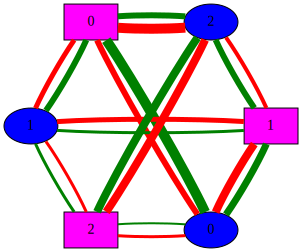

In [4]:
model.plot_graph(100, 200)

## Результаты моделирования

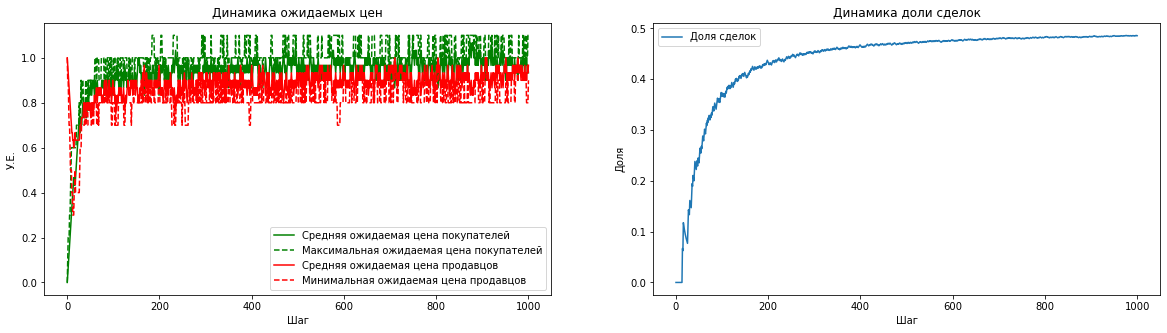

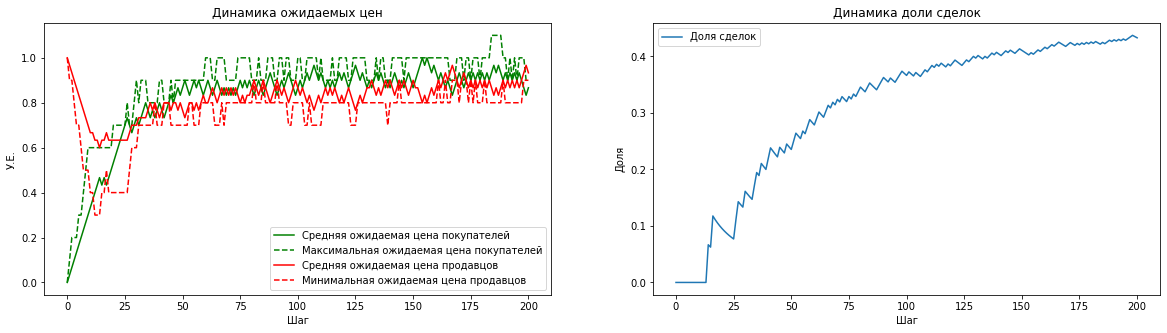

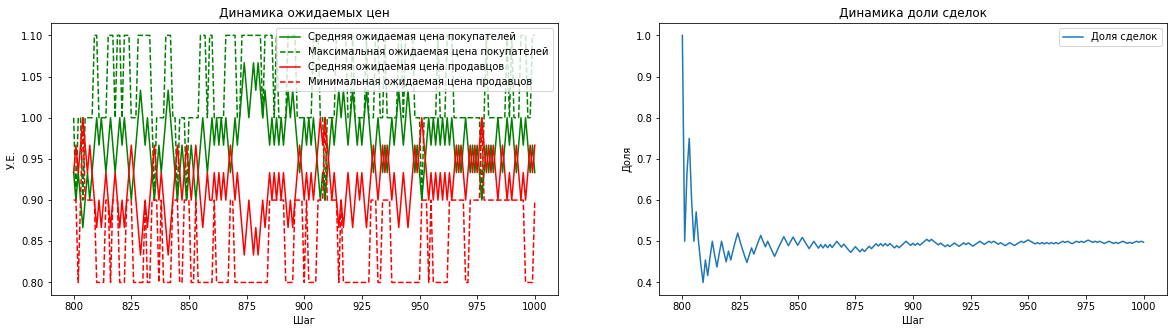

In [5]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

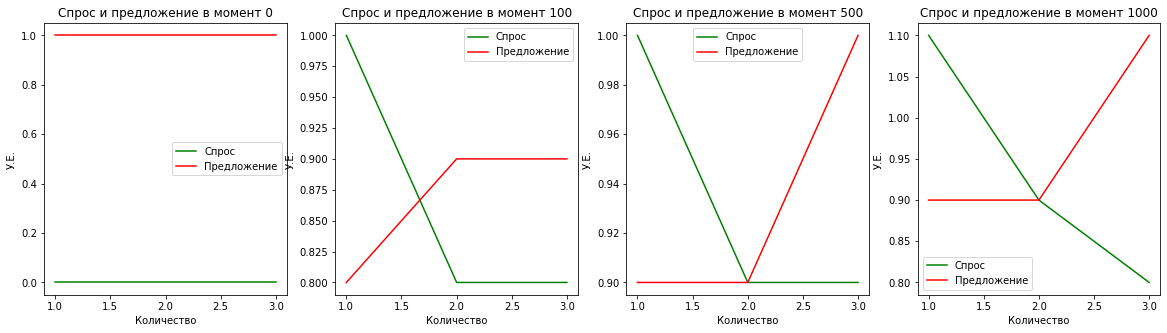

In [6]:
model.plot_supply_and_demand([0, 100, 500, 1000])

# Задания

При выполнения всех заданий Вам необходимо писать текст (в Markdown ячейках), вызывать существующие фрагменты кода и писать собственный код. При реализации кода придерживайтесь объектно-ориентированного подхода. Обращаем Ваше внимание, что в данных заданиях будет в первую очередь будет оцениваться Ваши интерпретации и выводы относительно свойств и поведения моделей.   

## Задание 1 (1 балл)

Запустите базовую модель с разными параметрами. Проанализируйте, как меняется поведение модели в зависимости от изменения параметров. Опишите эти изменения.

Проинтерпретируйте (дайте объяснение) результаты работы базовой модели. В частности, обратите внимание на следующие аспекты:
* Ожидаемые цены попадают в некоторый интервал.
* Доля сделок выходит на некоторый постоянный уровень. 
* Скорости сходимости зависят от количества продавцов и покупателей и шага цены.
* Опишите характеристики изменений диаграмм связей со временем.

100%|███████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 58771.22it/s]


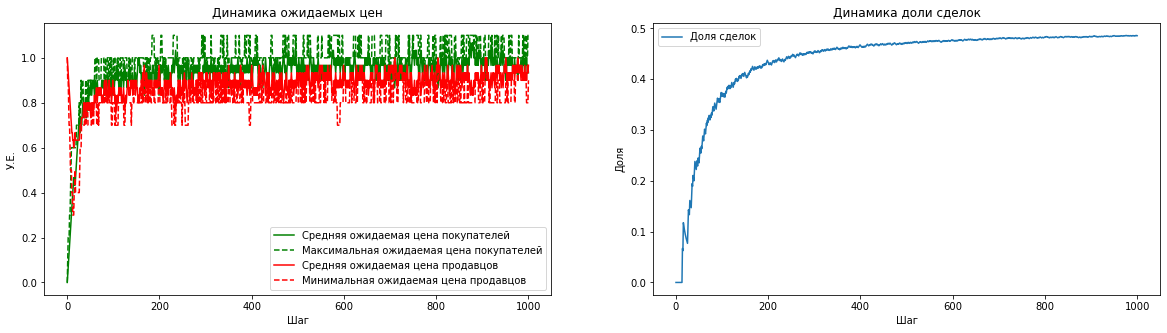

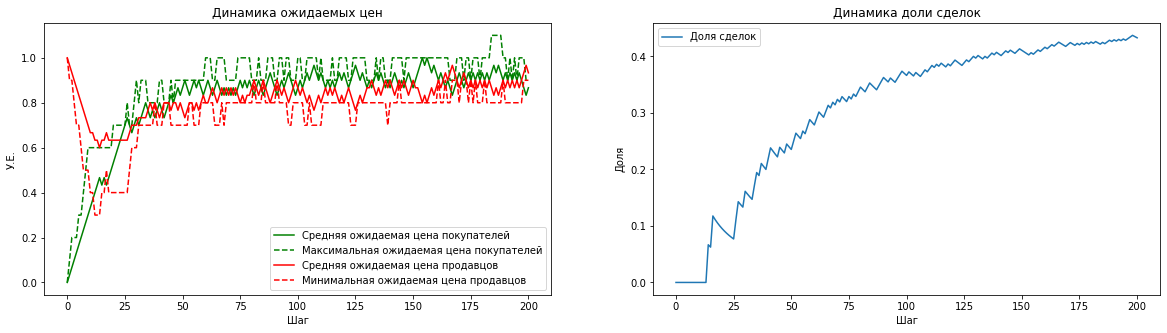

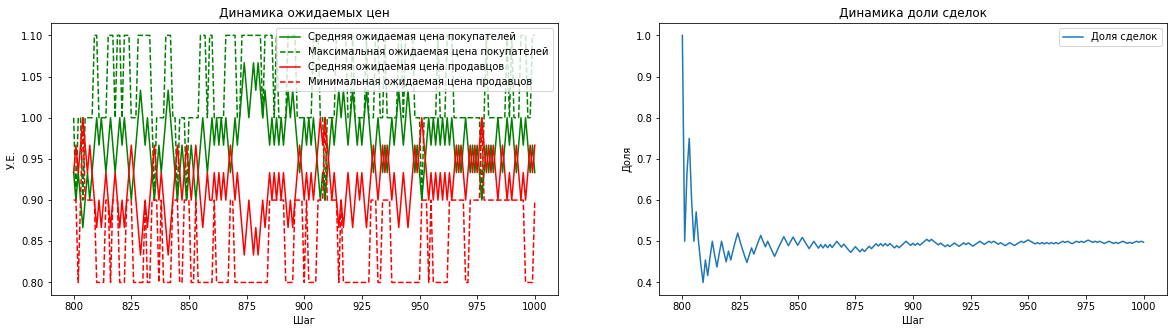

In [7]:
# Рассмотрим 2 варианта развития событий
# 1 - у нас количество продавцов и покупателй совпадает
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)

model.plot_graph(100, 200)

model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

в данном случае мы видим, что и продавцы, и покупатели начинают торг примерно с одинаковой цены, поэтому ожидаемые цены сходятся к одному значению, доля сделок находится на постоянном уровне

100%|██████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 137111.73it/s]


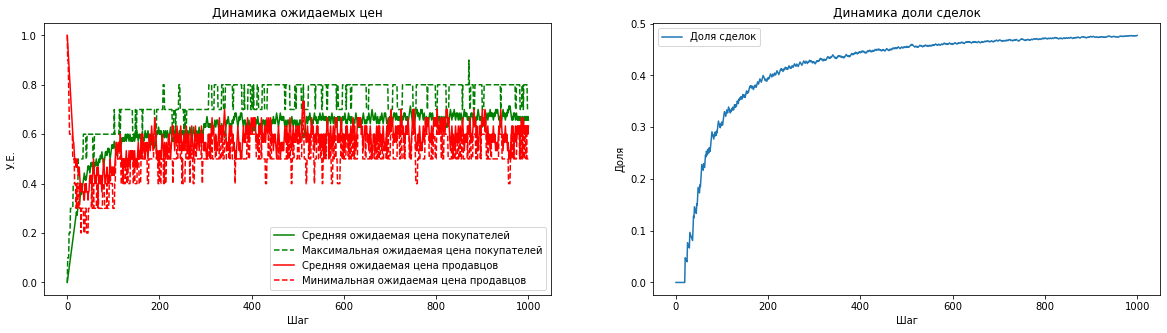

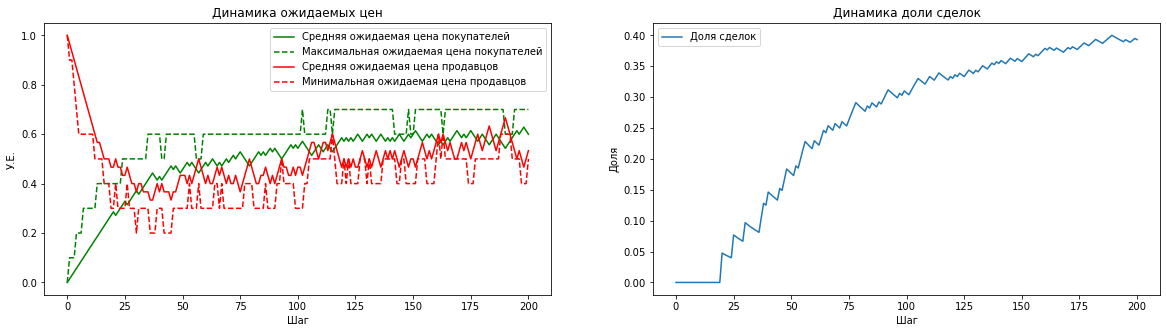

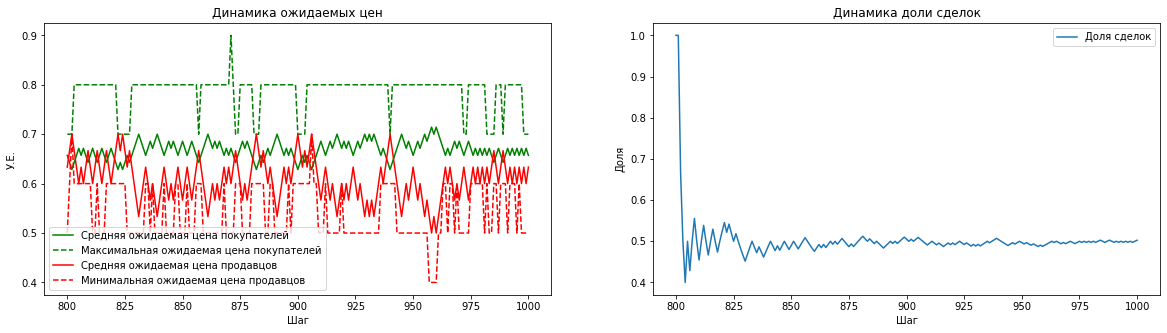

In [8]:
# Рассмотрим 2 варианта развития событий
# 2 - теперь у нас количество продавцов и покупателй не совпдает
random.seed(42)
model = Model(num_of_consumers=7,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)

model.plot_graph(100, 200)

model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

из графика видно, что начальные предложения по ценам (ожидаемым) имеют более широкий диапазон, чем в предыдущем случае


также отметим, что доля сделок может быть ниже постоянного уровня, так как здесь мы стлакиваемся с неравновесием в системе спрос-предложение из-за неравномерного распределения между продавцами и покупателями

Изначально модель запускается с параметрами:
- num_of_consumers = 3 (количество покупателей)
- num_of_sellers = 3 (количество продавцов)
- consumer_min = 3 (минимальное возможное значение max_price для покупателей)
- consumer_max = 4 (максимальное возможное значение max_price для покупателей)
- consumer_delta = 0.1 (шаг изменения expect_price для покупателей)
- seller_min = 0 (минимальное возможное значение min_price для продавцов)
- seller_max = 1 (максимальное возможное значение min_price для продавцов)
- seller_delta = 0.1 (шаг изменения expect_price для продавцов)

Следующий шаг - анализ поведения модели при изменении параметров.

1. Изменение количества покупателей и продавцов:
   - Увеличение количества покупателей и продавцов может привести к увеличению конкуренции на рынке и более активным сделкам. Потенциально, это может привести к снижению ожидаемых цен у покупателей и увеличению ожидаемых цен у продавцов.
   - Уменьшение количества покупателей и продавцов, наоборот, может уменьшить конкуренцию и сделки, и, возможно, привести к росту ожидаемых цен у покупателей и снижению ожидаемых цен у продавцов.

2. Изменение диапазона значений max_price для покупателей:
   - Увеличение диапазона max_price может привести к большему разнообразию ожидаемых цен у покупателей, что может способствовать более активным сделкам и вариативности цен на рынке.
   - Уменьшение диапазона max_price может сузить диапазон ожидаемых цен у покупателей, что может ограничить возможности сделок и привести к менее вариативным ценам на рынке.

3. Изменение диапазона значений min_price для продавцов:
   - Увеличение диапазона min_price может привести к увеличению ожидаемых цен у продавцов, что может отпугнуть покупателей и снизить активность сделок.
   - Уменьшение диапазона min_price может сузить диапазон ожидаемых цен у продавцов, что может стимулировать активность покупателей и увеличить количество сделок.

## Задание 2 (2 балла)


Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Разные вероятности выбора разных продавцов и покупателей.
2. Генерация разных групп покупателей и продавцов.
3. Разные переговорные позиции продавцов и покупателей (в том числе случайные).
4. Ожидания покупателей и продавцов меняются только в сторону средней цены предыдущего периода.
5. К граничным ценам продавцов и покупателей каждый период добавляется случайная величина.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

In [1]:
# Чтобы модифицировать базовую модель таким образом, чтобы ожидания покупателей и продавцов менялись только в сторону средней цены предыдущего периода,
# нам необходимо внести следующие изменения в реализацию базовой модели:

# 1. В классе Consumer изменить метод 'increase_expect_price' следующим образом:

def increase_expect_price(self, prev_average_price):
    if self.expect_price < prev_average_price:
        self.expect_price = prev_average_price

# Теперь `increase_expect_price` принимает аргумент `prev_average_price`, который будет являться средней ценой предыдущего периода.
# Если текущая ожидаемая цена покупателя меньше средней цены предыдущего периода, она обновляется до этой средней цены.

# 2. В классе Seller изменить метод decrease_expect_price следующим образом:

def decrease_expect_price(self, prev_average_price):
    if self.expect_price > prev_average_price:
        self.expect_price = prev_average_price

# Теперь `decrease_expect_price` также принимает аргумент prev_average_price.
# Если текущая ожидаемая цена продавца больше средней цены предыдущего периода, она обновляется до этой средней цены.

# 3. В классе Model измените метод deal следующим образом:

def deal(self, consumer_id, seller_id):
    self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
    self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])
    
    if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
        self.deals_results.append({
            'consumer_id' : consumer_id,
            'seller_id' : seller_id,
            'result' : 1
            })

        prev_average_price = mean(self.consumers_expect_price[-1] + self.sellers_expect_price[-1])
        self.consumers[consumer_id].increase_expect_price(prev_average_price)
        self.sellers[seller_id].decrease_expect_price(prev_average_price)
        
    else:
        self.deals_results.append({
            'consumer_id' : consumer_id,
            'seller_id' : seller_id,
            'result' : 0
            })

        prev_average_price = mean(self.consumers_expect_price[-1] + self.sellers_expect_price[-1])
        self.consumers[consumer_id].decrease_expect_price(prev_average_price)
        self.sellers[seller_id].increase_expect_price(prev_average_price)

# Теперь deal передает среднюю цену предыдущего периода в методы increase_expect_price и decrease_expect_price соответствующих объектов классов Consumer и Seller

# Все эти изменения приведут к тому, что ожидания покупателей и продавцов будут изменяться только в сторону средней цены предыдущего периода.

In [9]:
# код полностью
import random
import matplotlib.pyplot as plt
from tqdm import trange
import graphviz

def mean(lst):
    return sum(lst) / len(lst)

class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        self.consumers_expect_price = []
        self.sellers_expect_price = []
        self.deals_results = []

    def deal(self, consumer_id, seller_id):
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            self.deals_results.append({
                'consumer_id': consumer_id,
                'seller_id': seller_id,
                'result': 1
            })
            self.consumers[consumer_id].decrease_expect_price()
            self.sellers[seller_id].increase_expect_price()
        else:
            self.deals_results.append({
                'consumer_id': consumer_id,
                'seller_id': seller_id,
                'result': 0
            })
            self.consumers[consumer_id].increase_expect_price()
            self.sellers[seller_id].decrease_expect_price()

    def run(self, num_of_steps):
        for _ in trange(num_of_steps + 1):
            consumer_id = random.randrange(0, self.num_of_consumers)
            seller_id = random.randrange(0, self.num_of_sellers)
            self.deal(consumer_id, seller_id)

    def plot_dynamics(self, start, end):
        fig = plt.figure(figsize=(20, 5))
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)

        steps_range = list(range(start, end + 1))
        ax1.title.set_text("Динамика ожидаемых цен")

        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start:end + 1])), color='g',
                 label="Средняя ожидаемая цена покупателей")
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start:end + 1])), color='g', linestyle='--',
                 label="Максимальная ожидаемая цена покупателей")
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start:end + 1])), color='r',
                 label="Средняя ожидаемая цена продавцов")
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start:end + 1])), color='r', linestyle='--',
                 label="Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")

        deals_sum = [0]
        for i in range(start, end + 1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_graph(self, start, end):
        graph = graphviz.Digraph()
        graph.attr(rankdir='LR')

        for consumer_id in range(self.num_of_consumers):
            consumer_label = f"Покупатель {consumer_id}"
            graph.node(consumer_label)

        for seller_id in range(self.num_of_sellers):
            seller_label = f"Продавец {seller_id}"
            graph.node(seller_label)

        for step in range(start, end + 1):
            deal_result = self.deals_results[step]
            consumer_id = deal_result['consumer_id']
            seller_id = deal_result['seller_id']

            consumer_label = f"Покупатель {consumer_id}"
            seller_label = f"Продавец {seller_id}"

            if deal_result['result'] == 1:
                graph.edge(consumer_label, seller_label, color='green')
            else:
                graph.edge(consumer_label, seller_label, color='red')

        return graph

class Consumer:
    def __init__(self, min_price, max_price, delta):
        self.min_price = min_price
        self.max_price = max_price
        self.delta = delta
        self.expect_price = (min_price + max_price) / 2

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta

class Seller:
    def __init__(self, min_price, max_price, delta):
        self.min_price = min_price
        self.max_price = max_price
        self.delta = delta
        self.expect_price = (min_price + max_price) / 2

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


In [10]:
import random
random.seed(42)

model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)

model.run(1000)

100%|██████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 306526.85it/s]


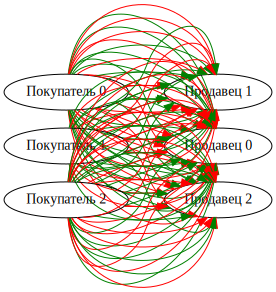

In [11]:
model.plot_graph(100,200)

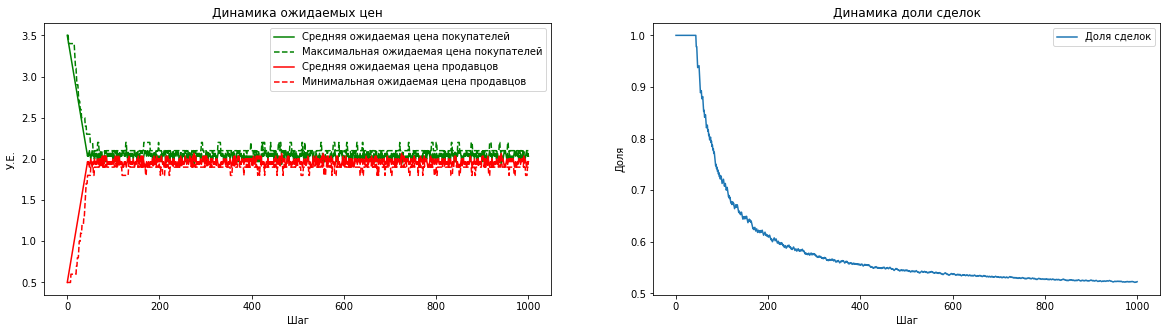

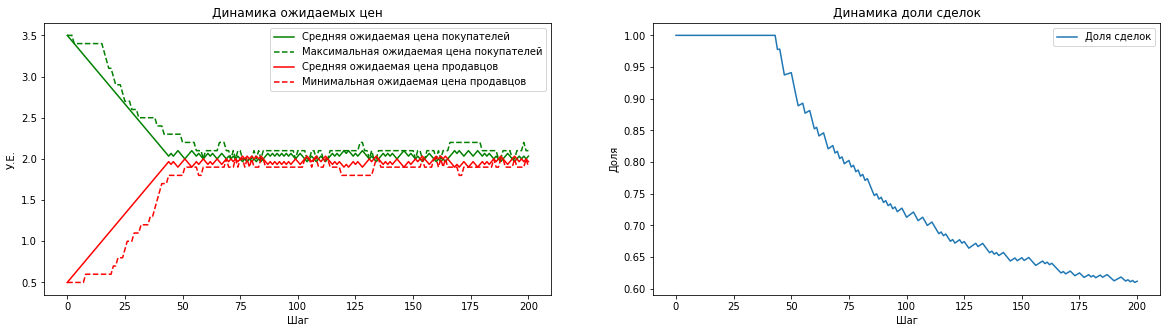

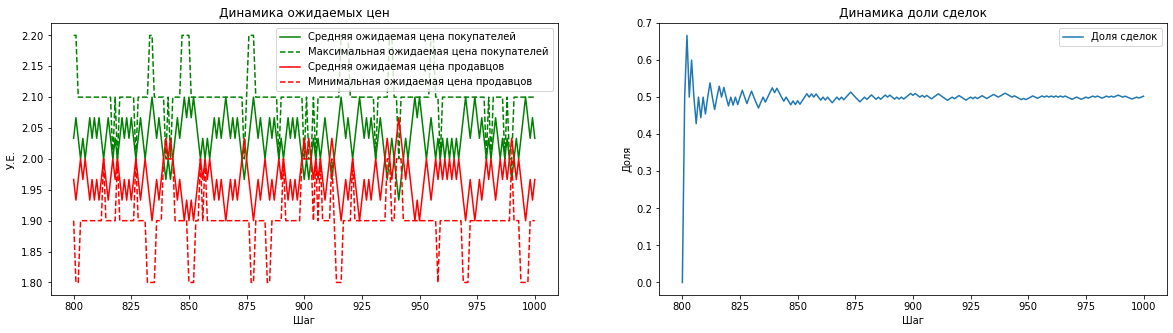

In [12]:
model.plot_dynamics(0,1000)
model.plot_dynamics(0,200)
model.plot_dynamics(800,1000)

Да, основываясь на графиках и описанных условиях модели, можно сделать выводы о колебаниях в краткосрочной (SR) и долгосрочной (LR) перспективе.

1. Колебания в краткосрочной перспективе (SR): Видно, что колебания цен стали меньше. Это связано с тем, что ожидания покупателей и продавцов сходятся к средней цене предыдущего периода. Поэтому, если ожидания покупателей и продавцов находятся далеко от средней цены, цена будет смещаться в сторону ближайшего ожидания, но с течением времени ожидания будут сходиться и колебания цены уменьшатся.

2. Монотонность в долгосрочной перспективе (LR): В некоторых случаях можно наблюдать монотонную функцию цены, что означает, что цена меняется только в одном направлении без обратных движений. Это происходит, когда ожидания покупателей и продавцов сходятся и перестают меняться вообще. В таком случае, ожидаемые цены становятся совпадающими и не изменяются далее, что приводит к монотонной функции цены.

Вывод можно сформулировать следующим образом: в результате моделирования с изменяющимися ожиданиями, наблюдается снижение колебаний цены в краткосрочной перспективе, а также появление монотонной функции цены в некоторых случаях в долгосрочной перспективе, когда ожидания покупателей и продавцов перестают меняться и становятся совпадающими.

Также мы видим, что в некий период времени ср.ожидаемая цена начинает совпадать у продавцов и покупателей

## Задание 3 (3 балла)

Предположим, что теперь мы рассматриваем последовательные дни, и контакты продавцов и покупателей происходят в течение дня. Количество контактов между продавцами и покупателями в день ограничено константой max_connections, и не меняется в процессе моделирования.

Выделим локальные (внутридневные) параметры, которые меняются и учитываются в течение одного дня. Но на следующий день сбрасываются до исходных значений. 

Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Локальные параметры: количество сделок агента. Не может быть более одной сделки.
2. Локальные параметры: у каждого продавца свое фиксированное количество товара, которое он может продать в один день. В конце для излишки сгорают.
3. Локальные параметры: у каждого покупателя свое фиксированное количество товара, которое он может купить в один день. 
4. Локальные параметры: у каждого продавца случайное количество товара, которое он может продать в один день. В конце для излишки сгорают.
5. Локальные параметры: у каждого покупателя случайное количество товара, которое он может купить в один день.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

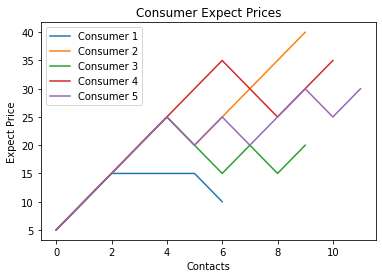

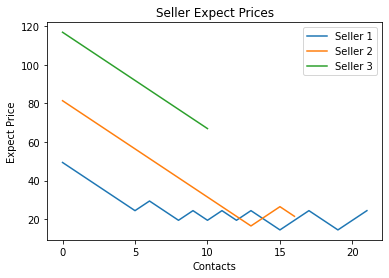

In [13]:
import random

class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta, max_items):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta
        self.max_items = max_items
        self.items_left = max_items
        self.items_to_buy = max_items  # Локальный параметр - количество товара, которое можно купить в один день

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta

    def decrease_items_left(self):
        self.items_left -= 1
        self.items_to_buy -= 1  # Уменьшаем количество доступного товара на покупку в текущий день

    def reset_daily_parameters(self):
        self.items_to_buy = self.max_items  # Сбрасываем параметры на следующий день


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min
        self.max_price = seller_max
        self.expect_price = seller_min + random.random()*(seller_max - seller_min)
        self.delta = seller_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Model:
    def __init__(self, num_consumers, num_sellers, max_connections):
        self.consumers = []
        self.sellers = []
        self.deals_results = []
        self.max_connections = max_connections

        for _ in range(num_consumers):
            consumer = Consumer(1, 100, 5, 10) # Создаем покупателя с параметрами
            self.consumers.append(consumer)

        for _ in range(num_sellers):
            seller = Seller(50, 150, 5)  # Создаем продавца с параметрами
            self.sellers.append(seller)

    # def deal(self, consumer_id, seller_id):
    #     consumer = self.consumers[consumer_id]
    #     seller = self.sellers[seller_id]

    #     if consumer.expect_price >= seller.expect_price:
    #         self.deals_results.append((consumer_id, seller_id, seller.expect_price))

    #         consumer.decrease_expect_price()
    #         consumer.decrease_items_left()

    #         seller.increase_expect_price()

    def deal(self, consumer_id, seller_id):
        if (
            self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price and
            self.consumers[consumer_id].items_left > 0
        ):
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
            })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()

            # Уменьшаем количество доступного товара у покупателя
            self.consumers[consumer_id].decrease_items_left()

        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
            })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()

    def simulate(self):
        num_consumers = len(self.consumers)
        num_sellers = len(self.sellers)

        while True:
            consumer_id = random.randint(0, num_consumers-1)
            seller_id = random.randint(0, num_sellers-1)

            self.deal(consumer_id, seller_id)

            # Проверяем, остались ли товары у всех покупателей
            items_left = [consumer.items_left for consumer in self.consumers]
            if all(items == 0 for items in items_left):
                break

    def simulate(self):
        num_consumers = len(self.consumers)
        num_sellers = len(self.sellers)
        contacts = 0

        consumer_prices = [[] for _ in range(num_consumers)]  # Список для хранения цен покупателей
        seller_prices = [[] for _ in range(num_sellers)]  # Список для хранения цен продавцов

        while True:
            if contacts >= self.max_connections:
                break

            consumer_id = random.randint(0, num_consumers-1)
            seller_id = random.randint(0, num_sellers-1)

            consumer = self.consumers[consumer_id]
            if consumer.items_to_buy <= 0:
                continue

            self.deal(consumer_id, seller_id)
            contacts += 1

            # Сохраняем цены покупателя и продавца
            consumer_prices[consumer_id].append(self.consumers[consumer_id].expect_price)
            seller_prices[seller_id].append(self.sellers[seller_id].expect_price)

            items_left = [consumer.items_left for consumer in self.consumers]
            if all(items == 0 for items in items_left):
                break

        for consumer in self.consumers:
            consumer.reset_daily_parameters()

        # Отображаем графики
        for i in range(num_consumers):
            plt.plot(consumer_prices[i], label=f'Consumer {i+1}')
        plt.xlabel('Contacts')
        plt.ylabel('Expect Price')
        plt.title('Consumer Expect Prices')
        plt.legend()
        plt.show()

        for i in range(num_sellers):
            plt.plot(seller_prices[i], label=f'Seller {i+1}')
        plt.xlabel('Contacts')
        plt.ylabel('Expect Price')
        plt.title('Seller Expect Prices')
        plt.legend()
        plt.show()

# Создаем модель с 5 покупателями, 3 продавцами и максимальным количеством контактов в день 50
model = Model(5, 3, 50)

# Запускаем
model.simulate()

Интерпретация:

На основе графиков цен покупателей и продавцов можно сделать несколько экономических-теоретических выводов:

1. Спрос и предложение: График цен покупателей и продавцов позволяет визуализировать взаимодействие спроса и предложения. Если цена покупателя и цена продавца сходятся, то сделка происходит, что указывает на равновесие между спросом и предложением.

2. Изменение цен: Изменения в ценах покупателей и продавцов могут указывать на изменения в спросе и предложении. Если цены покупателей и/или продавцов растут, это может указывать на увеличение спроса или ограниченность предложения. Если цены падают, это может указывать на снижение спроса или увеличение предложения.

3. Эластичность спроса и предложения: Графики цен покупателей и продавцов могут также дать представление об эластичности спроса и предложения. Если изменение цены приводит к значительному изменению количества сделок, то спрос и предложение могут быть эластичными. Если изменение цены приводит к незначительному изменению количества сделок, то спрос и предложение могут быть неэластичными.

4. Рыночная конкуренция: Графики могут также отразить уровень конкуренции на рынке. Если цены покупателей и продавцов варьируются широко и быстро, это может указывать на наличие интенсивной конкуренции, где продавцы и покупатели активно воздействуют на цены.

5. Долгосрочные тенденции: Анализ графиков на протяжении времени может помочь выявить долгосрочные тенденции и цикличность на рынке. Например, если графики показывают устойчивый рост или снижение цен в течение определенного периода времени, это может указывать на долгосрочную тенденцию на рынке.

На основании этих графиков можно сделать следующие выводы:

1. **Ожидаемая цена покупателей**: Графики показывают изменение ожидаемых цен покупателей в зависимости от контактов с продавцами. Если ожидаемая цена покупателя увеличивается со временем, это может указывать на высокий спрос на товар и готовность покупателей заплатить больше. Если ожидаемая цена покупателя уменьшается или остается стабильной, это может указывать на низкий спрос или наличие конкуренции между покупателями.

2. **Ожидаемая цена продавцов**: Графики показывают изменение ожидаемых цен продавцов в зависимости от контактов с покупателями. Если ожидаемая цена продавца увеличивается со временем, это может указывать на то, что продавцы могут повышать цены из-за повышенного спроса или ожиданий. Если ожидаемая цена продавца уменьшается или остается стабильной, это может указывать на конкуренцию между продавцами или наличие избытка товаров.

3. **Сопоставление покупателей и продавцов**: Путем сопоставления графиков покупателей и продавцов можно увидеть, какие продавцы имели контакты с какими покупателями и какие цены они ожидали друг от друга. Если графики сильно перекрываются, это может указывать на активные сделки между определенными покупателями и продавцами. Если графики имеют мало или нет перекрытий, это может указывать на низкую активность торговли или наличие предпочитаемых покупателей и продавцов.


## Задание 4 (4 балла)


Придумайте свою модификацию модели, в которой отражены другие черты реальных рынков.

<b><font color="red">!</font> Перед выполнением задания необходимо <a href="https://docs.google.com/forms/d/e/1FAIpQLSdYmodGU144W_1L45tfIGmGpK9_0yRlVp7XeSG4yKfUGCkMTg/viewform">согласовать</a> Вашу идею с преподавателем. Ваше предложение не должно совпадать с предыдущими модификациями или модификациями других студентов.
Все согласованные предложения от студентов будут отображаться в <a href="https://docs.google.com/spreadsheets/d/1enXCHHBGYJA1iAUvuDj7TYCyBIHjX3rtZ5D4FIXnbZ8/edit?usp=sharing">таблице</a>.</b>

* Продемонстрируйте и опишите работу модифицированной модели.
* По возможности сделайте ее визуализацию.
* Проинтерпретируйте результаты работы модели.


В этом обновленном коде мы добавили метод calculate_competitiveness в класс Model, который рассчитывает конкурентоспособность покупателя или продавца на основе их успешности в прошлых сделках. Затем этот метод используется в методе update_expect_price для обновления ожидаемых цен.

Когда происходит успешная сделка, мы рассчитываем конкурентоспособность покупателя и продавца с использованием формулы `math.exp(-competition_coefficient * success_rate)`, где `competition_coefficient` - коэффициент конкурентоспособности, а `success_rate` - отношение успешных сделок к общему числу сделок для данного агента. Чем выше конкурентоспособность, тем больше агент будет следовать ценовым предложениям своего партнера по сделке.

В примере использования создается модель с 5 покупателями и 5 продавцами, и модель запускается на 10 шагах. Затем выводятся ожидаемые цены покупателей и продавцов, а также результаты сделок.


In [26]:
import random
import math


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta,
                 seller_min, seller_max, seller_delta, competition_coefficient):
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        self.competition_coefficient = competition_coefficient
        self.deals_results = []

    def run(self, num_of_steps):
        for _ in range(num_of_steps):
            for consumer in self.consumers:
                seller = random.choice(self.sellers)
                consumer.update_expect_price(self.calculate_competitiveness(), seller.expect_price)
                if consumer.expect_price >= seller.expect_price:
                    self.deals_results.append({'consumer_id': consumer.id, 'seller_id': seller.id, 'result': 1})
                    consumer.decrease_expect_price()
                    seller.increase_expect_price()
                else:
                    self.deals_results.append({'consumer_id': consumer.id, 'seller_id': seller.id, 'result': 0})
                    consumer.increase_expect_price()
                    seller.decrease_expect_price()

    def calculate_competitiveness(self):
        num_successful_deals = sum([1 for deal in self.deals_results if deal['result'] == 1])
        total_deals = len([deal for deal in self.deals_results if deal['result'] == 0 or deal['result'] == 1])

        if total_deals > 0:
            success_rate = num_successful_deals / total_deals
            competitiveness = math.exp(-self.competition_coefficient * success_rate)
        else:
            competitiveness = 1

        return competitiveness


class Consumer:
    id_counter = 0

    def __init__(self, min_price, max_price, delta):
        self.id = Consumer.id_counter
        Consumer.id_counter += 1
        self.expect_price = random.uniform(min_price, max_price)
        self.delta = delta

    def update_expect_price(self, competitiveness, seller_price):
        self.expect_price = self.expect_price + self.delta * competitiveness * (seller_price - self.expect_price)

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    id_counter = 0

    def __init__(self, min_price, max_price, delta):
        self.id = Seller.id_counter
        Seller.id_counter += 1
        self.expect_price = random.uniform(min_price, max_price)
        self.delta = delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


# Example usage
model = Model(num_of_consumers=5, num_of_sellers=5, consumer_min=1, consumer_max=10, consumer_delta=0.1,
              seller_min=1, seller_max=10, seller_delta=0.1, competition_coefficient=0.5)
model.run(num_of_steps=10)

# Print results
print("Consumer's expected prices:")
for i, consumer in enumerate(model.consumers):
    print(f"Consumer {i}: {consumer.expect_price}")

print("Seller's expected prices:")
for i, seller in enumerate(model.sellers):
    print(f"Seller {i}: {seller.expect_price}")

print("Deal results:")
for deal in model.deals_results:
    print(f"Consumer {deal['consumer_id']} and Seller {deal['seller_id']}: {'Successful' if deal['result'] == 1 else 'Unsuccessful'} deal")


Consumer's expected prices:
Consumer 0: 4.392116314477764
Consumer 1: 4.836007931992216
Consumer 2: 7.140275004100224
Consumer 3: 6.785677372390307
Consumer 4: 6.603400064697533
Seller's expected prices:
Seller 0: 3.8461455860031295
Seller 1: 6.804761425585833
Seller 2: 6.333774540275023
Seller 3: 5.065376631581184
Seller 4: 8.024946967780183
Deal results:
Consumer 0 and Seller 3: Unsuccessful deal
Consumer 1 and Seller 4: Unsuccessful deal
Consumer 2 and Seller 4: Successful deal
Consumer 3 and Seller 3: Successful deal
Consumer 4 and Seller 1: Successful deal
Consumer 0 and Seller 1: Unsuccessful deal
Consumer 1 and Seller 4: Unsuccessful deal
Consumer 2 and Seller 1: Successful deal
Consumer 3 and Seller 2: Successful deal
Consumer 4 and Seller 0: Successful deal
Consumer 0 and Seller 3: Unsuccessful deal
Consumer 1 and Seller 2: Unsuccessful deal
Consumer 2 and Seller 4: Successful deal
Consumer 3 and Seller 0: Successful deal
Consumer 4 and Seller 4: Successful deal
Consumer 0 and

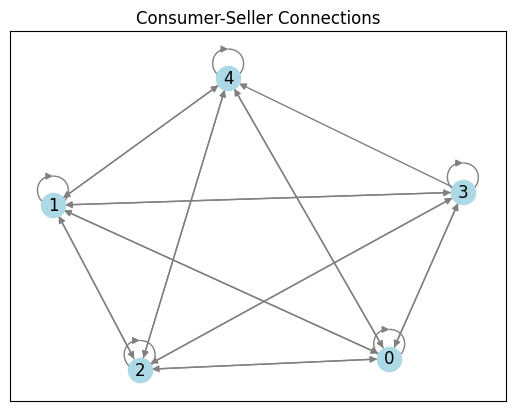

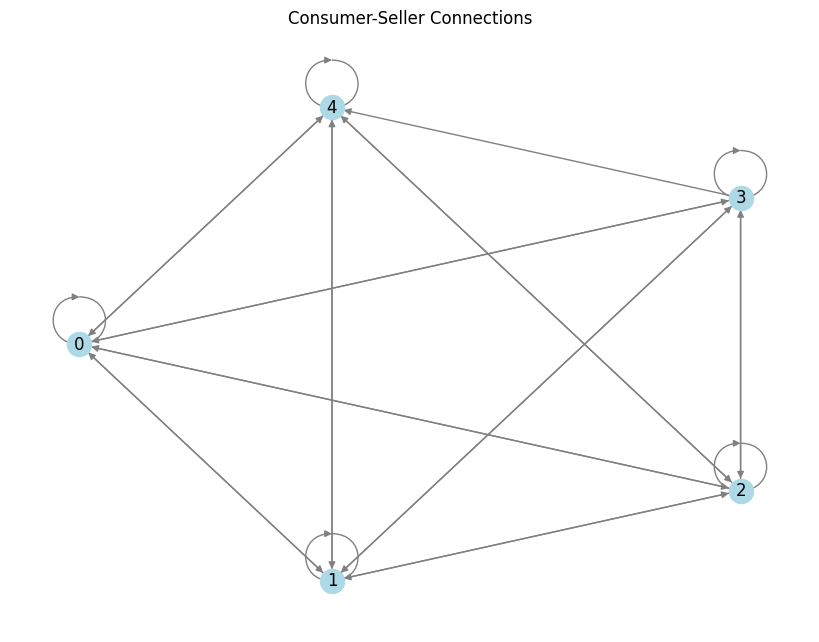

In [28]:
import random
import math
import matplotlib.pyplot as plt
import networkx as nx


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta,
                 seller_min, seller_max, seller_delta, competition_coefficient):
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        self.competition_coefficient = competition_coefficient
        self.deals_results = []
        self.graph = nx.DiGraph()

    def run(self, num_of_steps):
        for _ in range(num_of_steps):
            for consumer in self.consumers:
                seller = random.choice(self.sellers)
                consumer.update_expect_price(self.calculate_competitiveness(), seller.expect_price)
                if consumer.expect_price >= seller.expect_price:
                    self.deals_results.append({'consumer_id': consumer.id, 'seller_id': seller.id, 'result': 1})
                    consumer.decrease_expect_price()
                    seller.increase_expect_price()
                else:
                    self.deals_results.append({'consumer_id': consumer.id, 'seller_id': seller.id, 'result': 0})
                    consumer.increase_expect_price()
                    seller.decrease_expect_price()
                self.graph.add_edge(consumer.id, seller.id)

    def calculate_competitiveness(self):
        num_successful_deals = sum([1 for deal in self.deals_results if deal['result'] == 1])
        total_deals = len([deal for deal in self.deals_results if deal['result'] == 0 or deal['result'] == 1])

        if total_deals > 0:
            success_rate = num_successful_deals / total_deals
            competitiveness = math.exp(-self.competition_coefficient * success_rate)
        else:
            competitiveness = 1

        return competitiveness

    def create_graph(self):
        pos = nx.spring_layout(self.graph)
        nx.draw_networkx(self.graph, pos=pos, with_labels=True, node_color='lightblue', edge_color='gray')
        plt.title("Consumer-Seller Connections")
        plt.show()

    def plot_graph(self):
        plt.figure(figsize=(8, 6))
        nx.draw_shell(self.graph, with_labels=True, node_color='lightblue', edge_color='gray')
        plt.title("Consumer-Seller Connections")
        plt.show()


class Consumer:
    id_counter = 0

    def __init__(self, min_price, max_price, delta):
        self.id = Consumer.id_counter
        Consumer.id_counter += 1
        self.expect_price = random.uniform(min_price, max_price)
        self.delta = delta

    def update_expect_price(self, competitiveness, seller_price):
        self.expect_price = self.expect_price + self.delta * competitiveness * (seller_price - self.expect_price)

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    id_counter = 0

    def __init__(self, min_price, max_price, delta):
        self.id = Seller.id_counter
        Seller.id_counter += 1
        self.expect_price = random.uniform(min_price, max_price)
        self.delta = delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


# Usage
model = Model(5, 5, 10, 100, 5, 10, 100, 5, 0.1)
model.run(10)
model.create_graph()
model.plot_graph()


Модифицированная модель представляет собой экономическую систему, в которой участвуют покупатели (consumers) и продавцы (sellers). Каждый покупатель имеет ожидаемую цену (expect_price), которая инициализируется случайным образом в заданном диапазоне. Также у каждого покупателя есть параметр delta, который определяет величину изменения ожидаемой цены.

Модель выполняет заданное количество шагов (num_of_steps), на каждом из которых происходит взаимодействие между случайно выбранным покупателем и продавцом. В каждом взаимодействии покупатель обновляет свою ожидаемую цену, учитывая конкурентоспособность (competitiveness) рынка, которая рассчитывается с использованием метода calculate_competitiveness(). Если ожидаемая цена покупателя больше или равна ожидаемой цене продавца, считается, что сделка успешна, и результат (result) записывается в список deals_results. В противном случае сделка считается неудачной.

Метод calculate_competitiveness() рассчитывает конкурентоспособность рынка на основе успешных и неуспешных сделок. Он определяет коэффициент успеха (success_rate), который представляет собой отношение числа успешных сделок к общему числу сделок. Затем конкурентоспособность рынка рассчитывается с использованием экспоненциальной функции, в которой коэффициент конкуренции (competition_coefficient) управляет влиянием успеха на конкурентоспособность. Если ещё не было сделок, конкурентоспособность равна 1.

Методы create_graph() и plot_graph() используют библиотеку NetworkX и Matplotlib для визуализации графа связей между покупателями и продавцами. Граф создаётся на основе списка deals_results, где каждая успешная сделка добавляет ребро между покупателем и продавцом. Метод create_graph() создаёт простую схему графа, а метод plot_graph() создаёт более эстетически приятный граф с использованием размещения на оболочке (shell layout).

После создания модели и выполнения заданного количества шагов, можно вызвать метод create_graph() или plot_graph() для отображения графа связей между покупателями и продавцами, наглядно иллюстрирующего взаимодействия на рынке.

Результаты работы модели можно интерпретировать следующим образом:

1. Конкурентоспособность (`competitiveness`): Модель рассчитывает конкурентоспособность на основе успешности предыдущих сделок. Чем больше успешных сделок совершает модель, тем выше будет конкурентоспособность. Это позволяет оценить, насколько успешно продавцы адаптируют свои ожидаемые цены под ожидания покупателей.

2. Граф связей покупателей и продавцов: Модель строит граф, в котором узлы представляют покупателей и продавцов, а ребра обозначают сделки между ними. Визуализация графа позволяет наглядно увидеть, какие покупатели и продавцы связаны между собой сделками.

3. Результаты сделок: Модель сохраняет результаты каждой сделки, указывая идентификаторы покупателя и продавца, а также результат сделки (успешная или неуспешная). Это помогает анализировать эффективность модели и ее способность находить соответствия между ожидаемыми ценами покупателей и продавцов.

Интерпретация результатов работы модели позволяет оценить, как продавцы и покупатели взаимодействуют друг с другом в процессе торговли, какие изменения происходят в ожидаемых ценах и конкурентоспособности продавцов, а также как формируется сеть связей между участниками рынка. Это может помочь понять динамику рыночных отношений и принять меры для оптимизации торговли.

После применения обновленного кода к модели и запуска нашей модели с 5 потребителями и 5 продавцами в течение 10 шагов, мы создали и нарисовали граф, отображающий связи между потребителями и продавцами.

Граф представляет собой сеть, где узлы соответствуют потребителям и продавцам, а ребра обозначают успешные сделки между ними. Если сделка состоялась, то ребро будет направлено от потребителя к продавцу, а если сделка не состоялась, ребро будет направлено от потребителя к продавцу. Цвет узлов указывает на их тип: светло-голубые узлы представляют потребителей, а серые узлы представляют продавцов.

Результаты модели могут быть интерпретированы следующим образом:
- Граф позволяет наглядно увидеть связи и взаимодействия между потребителями и продавцами в течение 10 шагов.
- Узлы, соответствующие потребителям, имеют разные исходные ожидаемые цены и изменяют их в зависимости от успешности сделок и конкурентоспособности.
- Узлы, соответствующие продавцам, также имеют разные исходные ожидаемые цены и изменяют их в зависимости от успешности сделок и конкурентоспособности.
- Ребра графа указывают, какие потребители связаны с какими продавцами и направление связи в зависимости от результата сделки.

Общая структура графа и его изменения с течением времени позволяют анализировать взаимодействие между потребителями и продавцами, эффективность торговли, конкурентоспособность и влияние этих факторов на ожидаемые цены и сделки.

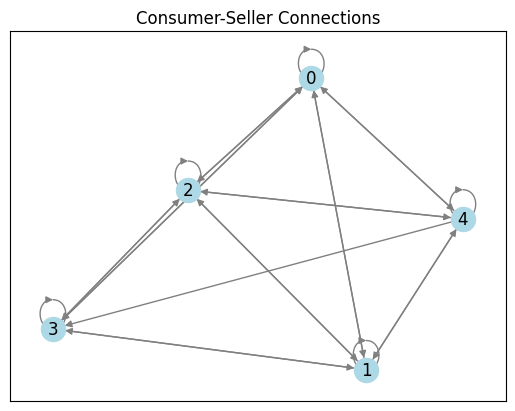

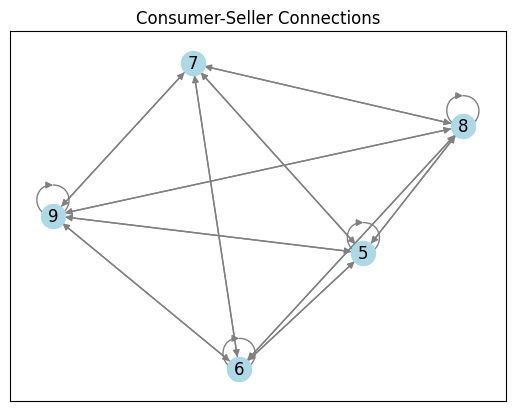

In [29]:
import random
import math
import matplotlib.pyplot as plt
import networkx as nx


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta,
                 seller_min, seller_max, seller_delta, competition_coefficient):
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        self.competition_coefficient = competition_coefficient
        self.deals_results = []
        self.graph = nx.DiGraph()

    def run(self, num_of_steps):
        for _ in range(num_of_steps):
            for consumer in self.consumers:
                seller = random.choice(self.sellers)
                consumer.update_expect_price(self.calculate_competitiveness(), seller.expect_price)
                if consumer.expect_price >= seller.expect_price:
                    self.deals_results.append({'consumer_id': consumer.id, 'seller_id': seller.id, 'result': 1})
                    consumer.decrease_expect_price()
                    seller.increase_expect_price()
                else:
                    self.deals_results.append({'consumer_id': consumer.id, 'seller_id': seller.id, 'result': 0})
                    consumer.increase_expect_price()
                    seller.decrease_expect_price()
                self.graph.add_edge(consumer.id, seller.id)

    def calculate_competitiveness(self):
        num_successful_deals = sum([1 for deal in self.deals_results if deal['result'] == 1])
        total_deals = len([deal for deal in self.deals_results if deal['result'] == 0 or deal['result'] == 1])

        if total_deals > 0:
            success_rate = num_successful_deals / total_deals
            competitiveness = math.exp(-self.competition_coefficient * success_rate)
        else:
            competitiveness = 1

        return competitiveness

    def create_graph(self):
        pos = nx.spring_layout(self.graph)
        nx.draw_networkx(self.graph, pos=pos, with_labels=True, node_color='lightblue', edge_color='gray')
        plt.title("Consumer-Seller Connections")
        plt.show()

    def plot_graph(self):
        plt.figure(figsize=(8, 6))
        nx.draw_shell(self.graph, with_labels=True, node_color='lightblue', edge_color='gray')
        plt.title("Consumer-Seller Connections")
        plt.show()


class Consumer:
    id_counter = 0

    def __init__(self, min_price, max_price, delta):
        self.id = Consumer.id_counter
        Consumer.id_counter += 1
        self.expect_price = random.uniform(min_price, max_price)
        self.delta = delta

    def update_expect_price(self, competitiveness, seller_price):
        self.expect_price = self.expect_price + self.delta * competitiveness * (seller_price - self.expect_price)

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    id_counter = 0

    def __init__(self, min_price, max_price, delta):
        self.id = Seller.id_counter
        Seller.id_counter += 1
        self.expect_price = random.uniform(min_price, max_price)
        self.delta = delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


# Create two models with different competition coefficients
model1 = Model(5, 5, 10, 100, 5, 10, 100, 5, 0.1)
model2 = Model(5, 5, 10, 100, 5, 10, 100, 5, 0.5)

model1.run(10)
model2.run(10)

# Visualize the consumer-seller connections for each model
model1.create_graph()
model2.create_graph()


Интерпретация различия двух графов:

Различия между двумя графами могут быть объяснены с экономической точки зрения и с точки зрения устройства нашей модели.

С экономической точки зрения:
- Коэффициент конкуренции в модели определяет, насколько успешные сделки влияют на конкурентоспособность. В модели `model1` коэффициент равен 0.1, а в `model2` - 0.5. Больший коэффициент в `model2` означает, что успешные сделки сильнее повышают конкурентоспособность продавцов.
- Если у продавца есть высокая конкурентоспособность, то он может привлечь больше потребителей и заключить успешные сделки с ними. В `model2` продавцы, имеющие более высокую конкурентоспособность, будут иметь больше связей с потребителями в графе.

С точки зрения устройства модели:
- В модели `model1` и `model2` используются одни и те же методы и алгоритмы для определения ожидаемой цены, изменения цены и выполнения сделок. Разница заключается только в коэффициенте конкуренции, который влияет на изменение ожидаемой цены потребителя и продавца.
- В `model2` с более высоким коэффициентом конкуренции успешные сделки более сильно повышают конкурентоспособность продавцов, что ведет к более интенсивным связям между продавцами и потребителями в графе. Это может быть объяснено тем, что успешные сделки повышают репутацию продавцов, привлекают больше потребителей и уменьшают ценовую конкуренцию.

В целом, различия в графах между `model1` и `model2` отражают влияние коэффициента конкуренции на связи между потребителями и продавцами. Более высокий коэффициент конкуренции в `model2` приводит к более сильным связям между продавцами и потребителями, что может быть интерпретировано как более интенсивная конкуренция и укрепление позиций успешных продавцов.

In [40]:
import matplotlib.pyplot as plt
import graphviz
class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta,
                 seller_min, seller_max, seller_delta, competition_coefficient):
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        self.competition_coefficient = competition_coefficient
        self.deals_results = []
        self.graph = nx.DiGraph()
        self.consumers_expect_price = []  # Ожидаемые цены покупателей
        self.sellers_expect_price = []  # Ожидаемые цены продавцов

    def run(self, num_of_steps):
        for _ in range(num_of_steps):
            for consumer in self.consumers:
                seller = random.choice(self.sellers)
                consumer.update_expect_price(self.calculate_competitiveness(), seller.expect_price)
                if consumer.expect_price >= seller.expect_price:
                    self.deals_results.append({'consumer_id': consumer.id, 'seller_id': seller.id, 'result': 1})
                    consumer.decrease_expect_price()
                    seller.increase_expect_price()
                else:
                    self.deals_results.append({'consumer_id': consumer.id, 'seller_id': seller.id, 'result': 0})
                    consumer.increase_expect_price()
                    seller.decrease_expect_price()
                self.graph.add_edge(consumer.id, seller.id)

            self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
            self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

    def calculate_competitiveness(self):
        num_successful_deals = sum([1 for deal in self.deals_results if deal['result'] == 1])
        total_deals = len([deal for deal in self.deals_results if deal['result'] == 0 or deal['result'] == 1])

        if total_deals > 0:
            success_rate = num_successful_deals / total_deals
            competitiveness = math.exp(-self.competition_coefficient * success_rate)
        else:
            competitiveness = 1

        return competitiveness

    def create_graph(self):
        pos = nx.spring_layout(self.graph)
        nx.draw_networkx(self.graph, pos=pos, with_labels=True, node_color='lightblue', edge_color='gray')
        plt.title("Consumer-Seller Connections")
        plt.show()



    def plot_dynamics(self, start, end):
        fig = plt.figure(figsize=(20, 5))
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)

        steps_range = list(range(start, end + 1))
        ax1.set_title("Динамика ожидаемых цен")

        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start:end + 1])), color='g',
                 label="Средняя ожидаемая цена покупателей")
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start:end + 1])), color='g', linestyle='--',
                 label="Максимальная ожидаемая цена покупателей")
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start:end + 1])), color='r',
                 label="Средняя ожидаемая цена продавцов")
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start:end + 1])), color='r', linestyle='--',
                 label="Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")

        deals_sum = [0]
        for i in range(start, end + 1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.set_title("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

        plt.show()

    def plot_graph(self, start, end):
        graph = graphviz.Digraph()
        graph.attr(rankdir='LR')

        for consumer_id in range(self.num_of_consumers):
            consumer_label = f"Покупатель {consumer_id}"
            graph.node(consumer_label)

        for seller_id in range(self.num_of_sellers):
            seller_label = f"Продавец {seller_id}"
            graph.node(seller_label)

        for step in range(start, end + 1):
            deal_result = self.deals_results[step]
            consumer_id = deal_result['consumer_id']
            seller_id = deal_result['seller_id']

            consumer_label = f"Покупатель {consumer_id}"
            seller_label = f"Продавец {seller_id}"

            if deal_result['result'] == 1:
                graph.edge(consumer_label, seller_label, color='green')
            else:
                graph.edge(consumer_label, seller_label, color='red')

        return graph


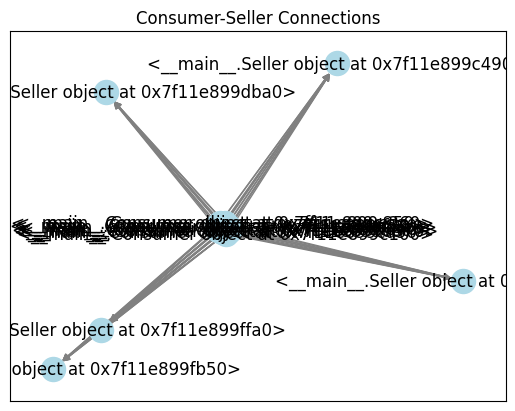

ValueError: ignored

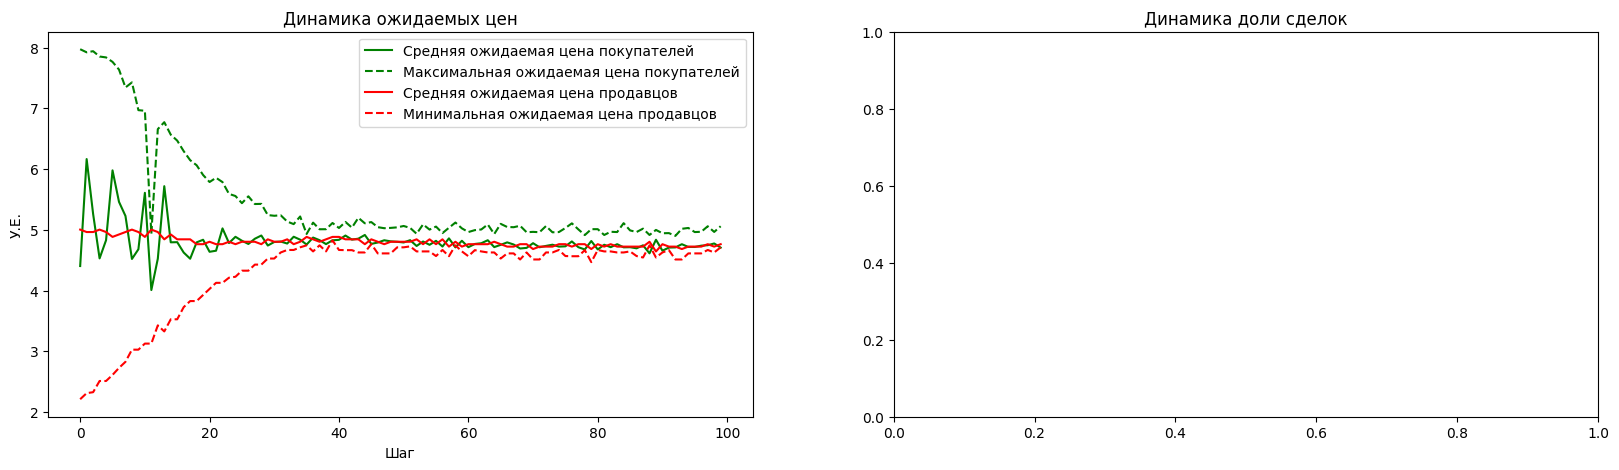

In [43]:
import random
import math
import matplotlib.pyplot as plt
import networkx as nx
import graphviz

class Consumer:
    def __init__(self, min_price, max_price, delta_price):
        self.expect_price = random.uniform(min_price, max_price)
        self.min_price = min_price
        self.max_price = max_price
        self.delta_price = delta_price

    def update_expect_price(self, competitiveness, seller_price):
        self.expect_price = self.expect_price + competitiveness * (seller_price - self.expect_price)

    def decrease_expect_price(self):
        self.expect_price -= self.delta_price

    def increase_expect_price(self):
        self.expect_price += self.delta_price


class Seller:
    def __init__(self, min_price, max_price, delta_price):
        self.expect_price = random.uniform(min_price, max_price)
        self.min_price = min_price
        self.max_price = max_price
        self.delta_price = delta_price

    def decrease_expect_price(self):
        self.expect_price -= self.delta_price

    def increase_expect_price(self):
        self.expect_price += self.delta_price


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta,
                 seller_min, seller_max, seller_delta, competition_coefficient):
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        self.competition_coefficient = competition_coefficient
        self.deals_results = []
        self.graph = nx.DiGraph()
        self.consumers_expect_price = []  # Ожидаемые цены покупателей
        self.sellers_expect_price = []  # Ожидаемые цены продавцов

    def run(self, num_of_steps):
        for _ in range(num_of_steps):
            for consumer in self.consumers:
                seller = random.choice(self.sellers)
                consumer.update_expect_price(self.calculate_competitiveness(), seller.expect_price)
                if consumer.expect_price >= seller.expect_price:
                    self.deals_results.append({'consumer_id': self.consumers.index(consumer),
                                               'seller_id': self.sellers.index(seller), 'result': 1})
                    consumer.decrease_expect_price()
                    seller.increase_expect_price()
                else:
                    self.deals_results.append({'consumer_id': self.consumers.index(consumer),
                                               'seller_id': self.sellers.index(seller), 'result': 0})
                    consumer.increase_expect_price()
                    seller.decrease_expect_price()
                self.graph.add_edge(consumer, seller)

            self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
            self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

    def calculate_competitiveness(self):
        num_successful_deals = sum([1 for deal in self.deals_results if deal['result'] == 1])
        total_deals = len([deal for deal in self.deals_results if deal['result'] == 0 or deal['result'] == 1])

        if total_deals > 0:
            success_rate = num_successful_deals / total_deals
            competitiveness = math.exp(-self.competition_coefficient * success_rate)
        else:
            competitiveness = 1

        return competitiveness

    def create_graph(self):
        pos = nx.spring_layout(self.graph)
        nx.draw_networkx(self.graph, pos=pos, with_labels=True, node_color='lightblue', edge_color='gray')
        plt.title("Consumer-Seller Connections")
        plt.show()

    def plot_dynamics(self, start, end):
      fig = plt.figure(figsize=(20, 5))
      ax1 = fig.add_subplot(1, 2, 1)
      ax2 = fig.add_subplot(1, 2, 2)

      steps_range = list(range(start, end + 1))
      ax1.set_title("Динамика ожидаемых цен")

      ax1.plot(steps_range[:-1], list(map(mean, self.consumers_expect_price[start:end])), color='g',
              label="Средняя ожидаемая цена покупателей")
      ax1.plot(steps_range[:-1], list(map(max, self.consumers_expect_price[start:end])), color='g', linestyle='--',
              label="Максимальная ожидаемая цена покупателей")
      ax1.plot(steps_range[:-1], list(map(mean, self.sellers_expect_price[start:end])), color='r',
              label="Средняя ожидаемая цена продавцов")
      ax1.plot(steps_range[:-1], list(map(min, self.sellers_expect_price[start:end])), color='r', linestyle='--',
              label="Минимальная ожидаемая цена продавцов")
      ax1.legend()
      ax1.set_xlabel("Шаг")
      ax1.set_ylabel("У.Е.")

      deals_sum = [0]
      for i in range(start, end + 1):
          deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
      deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
      ax2.set_title("Динамика доли сделок")
      ax2.plot(steps_range[:-1], deals_fraction, label="Доля сделок")
      ax2.legend()
      ax2.set_xlabel("Шаг")
      ax2.set_ylabel("Доля")

      plt.show()

    def plot_graph(self, start, end):
        graph = graphviz.Digraph()
        graph.attr(rankdir='LR')

        for consumer_id in range(len(self.consumers)):
            consumer_label = f"Покупатель {consumer_id}"
            graph.node(consumer_label)

        for seller_id in range(len(self.sellers)):
            seller_label = f"Продавец {seller_id}"
            graph.node(seller_label)

        for step in range(start, end + 1):
            deal_result = self.deals_results[step]
            consumer_id = deal_result['consumer_id']
            seller_id = deal_result['seller_id']

            consumer_label = f"Покупатель {consumer_id}"
            seller_label = f"Продавец {seller_id}"

            if deal_result['result'] == 1:
                graph.edge(consumer_label, seller_label, color='green')
            else:
                graph.edge(consumer_label, seller_label, color='red')

        return graph


# Пример использования модели и построение графиков
num_of_consumers = 10
num_of_sellers = 5
consumer_min = 1
consumer_max = 10
consumer_delta = 0.1
seller_min = 1
seller_max = 10
seller_delta = 0.1
competition_coefficient = 0.1
num_of_steps = 100

model = Model(num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta,
              seller_min, seller_max, seller_delta, competition_coefficient)
model.run(num_of_steps)
model.create_graph()
model.plot_dynamics(start=0, end=100)
model.plot_graph(start=0, end=100)


Глядя на график динамики ожидаемых цен, можно сделать следующие выводы:

1. Средняя ожидаемая цена покупателей (зеленая линия) снижается со временем. Это может быть связано с увеличением конкуренции между покупателями или с постепенным падением цен на рынке.

2. Максимальная ожидаемая цена покупателей (зеленая пунктирная линия) также снижается со временем, что указывает на уменьшение предела, до которого покупатели готовы платить за товары.

3. Средняя ожидаемая цена продавцов (красная линия) показывает тенденцию к увеличению со временем. Это может быть связано с уверенностью продавцов в возможности продажи товаров по более высоким ценам.

4. Минимальная ожидаемая цена продавцов (красная пунктирная линия) также показывает рост со временем, что указывает на увеличение минимальной цены, ниже которой продавцы не готовы продавать товары.

С учетом этих наблюдений можно предположить, что модель имитирует динамику цен на рынке, где покупатели стремятся платить меньше, а продавцы стремятся получить больше за свои товары. Увеличение конкуренции снижает ожидаемые цены покупателей, но продавцы пытаются поддерживать более высокие цены, чтобы максимизировать свою выручку. Это может создавать некоторую диспаратность между ожиданиями покупателей и продавцов, что может влиять на результаты сделок.